GL United FC


Q1-Import required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Load the dataset

In [2]:
df = pd.read_csv("fifa.csv")
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Q2-Explore the data FIFA doc Check the first few samples, shape, info of the data

In [3]:
# shape method can be used to check the exact shape of data
df.shape 

(18207, 60)

In [4]:
#info() function gives information about each feature such as no. of samples(rows), no. of columns along with their data types
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

Q3-Drop the columns which you think redundant for the analysis ('Photo','Flag','Club Logo')

In [5]:
df.drop(df.columns[[3, 5, 9]], axis=1, inplace=True)
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     18207 non-null  object 
 8   Wage                      18207 non-null  object 
 9   Preferred Foot            18159 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Weak Foot                 18159 non-null  float64
 12  Skill Moves               18159 non-null  float64
 13  Work Rate                 18159 non-null  object 
 14  Body T

Q4-Convert the columns "Value", "Wage", "Release Clause" to float datatype after getting rid of currency symbol and suffix

In [7]:
df['Value']= df['Value'].str.replace('€','')

In [8]:
df['Wage']= df['Wage'].str.replace('€','')

In [9]:
df['Release Clause']= df['Release Clause'].str.replace('€','')

In [10]:
df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110.5M,565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77M,405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5M,290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,72M,260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102M,355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60K,1K,Right,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143K
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60K,1K,Right,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113K
18204,241638,B. Worman,16,England,47,67,Cambridge United,60K,1K,Right,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165K
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60K,1K,Right,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143K


In [11]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0

In [12]:
df['Value'] = df['Value'].apply(value_to_float)

In [13]:
df['Wage'] = df['Wage'].apply(value_to_float)

In [14]:
df['Release Clause'] = df['Release Clause'].apply(value_to_float)

In [15]:
df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60000.0,1000.0,Right,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000.0
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60000.0,1000.0,Right,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113000.0
18204,241638,B. Worman,16,England,47,67,Cambridge United,60000.0,1000.0,Right,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165000.0
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60000.0,1000.0,Right,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143000.0


Q5-Convert the column "Joined" into integer data type with keeping only the
year

In [16]:
df['Joined'] = df['Joined'].str.split(',', expand=True)[1]
df['Joined'] = pd.to_numeric(df['Joined'].str.strip())
df['Joined'] = pd.to_numeric(df['Joined'], errors='coerce').fillna(0).astype(int)
df['Joined']

0        2004
1        2018
2        2017
3        2011
4        2015
         ... 
18202    2017
18203    2018
18204    2017
18205    2018
18206    2018
Name: Joined, Length: 18207, dtype: int32

Q6-Convert the column "Contract Valid Until" to pandas datetime type

In [17]:
df['Contract Valid Until']= pd.to_datetime(df['Contract Valid Until'])
# Check the format of 'Date' column
df['Contract Valid Until']

0       2021-01-01
1       2022-01-01
2       2022-01-01
3       2020-01-01
4       2023-01-01
           ...    
18202   2019-01-01
18203   2020-01-01
18204   2021-01-01
18205   2019-01-01
18206   2019-01-01
Name: Contract Valid Until, Length: 18207, dtype: datetime64[ns]

Q7-Convert the column 'Height'to float with decimal points

In [18]:
df['Height'] = df['Height'].str.split("'", expand=True)[0] + '.' + df['Height'].str.split("'", expand=True)[1]
df['Height'] = pd.to_numeric(df['Height'])
df['Height']

0        5.70
1        6.20
2        5.90
3        6.40
4        5.11
         ... 
18202    5.90
18203    6.30
18204    5.80
18205    5.10
18206    5.10
Name: Height, Length: 18207, dtype: float64

Q8-The column "Weight" has the suffix as lbs, remove the suffix and convert
to float.

In [19]:
df['Weight']

0        159lbs
1        183lbs
2        150lbs
3        168lbs
4        154lbs
          ...  
18202    134lbs
18203    170lbs
18204    148lbs
18205    154lbs
18206    176lbs
Name: Weight, Length: 18207, dtype: object

In [20]:
# weight column
df['Weight'] = pd.to_numeric(df['Weight'].str.replace('lbs',''))
df['Weight']

0        159.0
1        183.0
2        150.0
3        168.0
4        154.0
         ...  
18202    134.0
18203    170.0
18204    148.0
18205    154.0
18206    176.0
Name: Weight, Length: 18207, dtype: float64

Q9-Check for the percentage of missing values

In [21]:
#df.isnull().sum() / df.shape[0] * 100.00
df.isnull().sum()/len(df)*100

ID                           0.000000
Name                         0.000000
Age                          0.000000
Nationality                  0.000000
Overall                      0.000000
Potential                    0.000000
Club                         1.323667
Value                        1.384083
Wage                         1.323667
Preferred Foot               0.263635
International Reputation     0.263635
Weak Foot                    0.263635
Skill Moves                  0.263635
Work Rate                    0.263635
Body Type                    0.263635
Position                     0.329544
Jersey Number                0.329544
Joined                       0.000000
Loaned From                 93.057615
Contract Valid Until         1.587302
Height                       0.263635
Weight                       0.263635
Crossing                     0.263635
Finishing                    0.263635
HeadingAccuracy              0.263635
ShortPassing                 0.263635
Volleys     

The column "Loaned From" has missing values greater than 60%, we have to drop it.

Impute the missing values with appropriate imputation techniques.

In [22]:
df.drop(['Loaned From'],axis=1,inplace=True)

In [23]:
df.isnull().sum()/len(df)*100

ID                          0.000000
Name                        0.000000
Age                         0.000000
Nationality                 0.000000
Overall                     0.000000
Potential                   0.000000
Club                        1.323667
Value                       1.384083
Wage                        1.323667
Preferred Foot              0.263635
International Reputation    0.263635
Weak Foot                   0.263635
Skill Moves                 0.263635
Work Rate                   0.263635
Body Type                   0.263635
Position                    0.329544
Jersey Number               0.329544
Joined                      0.000000
Contract Valid Until        1.587302
Height                      0.263635
Weight                      0.263635
Crossing                    0.263635
Finishing                   0.263635
HeadingAccuracy             0.263635
ShortPassing                0.263635
Volleys                     0.263635
Dribbling                   0.263635
C

Q10-Plot the distribution of Overall rating for all the players and write your
findings

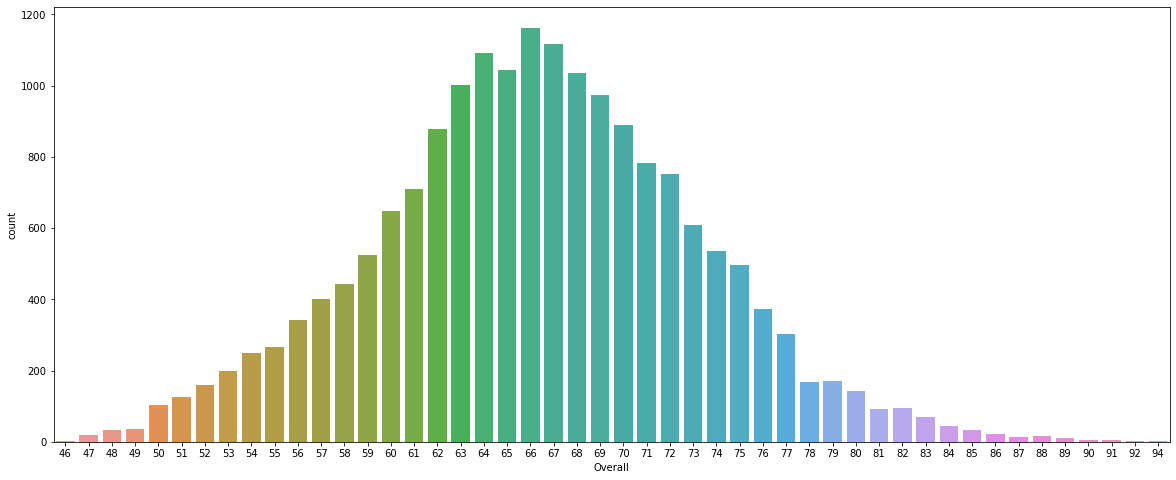

Mean:  66.23869940132916


In [24]:
plt.figure(figsize=(20,8))
sns.countplot(df['Overall'])
plt.show()
print('Mean: ',df['Overall'].mean())

Overall 70+ accommodated large number of the players

Q11-Retrieve the names of top20 players based on the Overall rating

In [25]:
top_20_names = df[['Name','Overall']].sort_values(by = 'Overall', ascending = False).head(20).reset_index ()
top_20_names

,index,Name,Overall
0,0,L. Messi,94
1,1,Cristiano Ronaldo,94
2,2,Neymar Jr,92
3,3,De Gea,91
4,4,K. De Bruyne,91
5,5,E. Hazard,91
6,6,L. Modrić,91
7,7,L. Suárez,91
8,8,Sergio Ramos,91
9,12,D. Godín,90


Q12-Generate a dataframe which should include all the information of the
Top 20 players based on the Overall rating

In [26]:
top_20_players_info = df.sort_values(by = 'Overall', ascending = False).head(20).reset_index()


In [27]:
top_20_players_info

,index,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
5,5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
6,6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
7,7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000000.0,455000.0,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,164000000.0
8,8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
9,12,182493,D. Godín,32,Uruguay,90,90,Atlético Madrid,44000000.0,125000.0,...,82.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,90200000.0


Q13-What is the average "Age" and "Wage" of these top 20 players?

In [28]:
avg_age = top_20_players_info['Age'].mean()
avg_wage = top_20_players_info['Wage'].mean()

print('Average Age of Top 20 Players is: ',avg_age)
print('Average Wage of Top 20 Players is: ',avg_wage)

Average Age of Top 20 Players is:  29.55
Average Wage of Top 20 Players is:  294950.0


Q14-Among the top 20 players based on the Overall rating, which player has
the highest wage?

In [29]:
max_wage = top_20_players_info['Wage'].max()
print('Maximum Wage is: ',max_wage)
max_wage_player = top_20_players_info.loc[top_20_players_info['Wage'] == max_wage, 'Name']
print('Player Name: ',max_wage_player)

Maximum Wage is:  565000.0
Player Name:  0    L. Messi
Name: Name, dtype: object


Q15-Generate a dataframe which should include the "Player name", "Club
Name", "Wage", and 'Overall rating'.

In [30]:
new_df = df[['Name','Club','Wage','Overall']].copy()
new_df

,Name,Club,Wage,Overall
0,L. Messi,FC Barcelona,565000.0,94
1,Cristiano Ronaldo,Juventus,405000.0,94
2,Neymar Jr,Paris Saint-Germain,290000.0,92
3,De Gea,Manchester United,260000.0,91
4,K. De Bruyne,Manchester City,355000.0,91
...,...,...,...,...
18202,J. Lundstram,Crewe Alexandra,1000.0,47
18203,N. Christoffersson,Trelleborgs FF,1000.0,47
18204,B. Worman,Cambridge United,1000.0,47
18205,D. Walker-Rice,Tranmere Rovers,1000.0,47


Q15-i Find the average Overall rating for each club.
new_df

In [31]:
distinct_clubs = len(pd.unique(df['Club']))
print('Count of Clubs: ',distinct_clubs)
new_df.groupby('Club', as_index=False)['Overall'].mean()

Count of Clubs:  652


,Club,Overall
0,SSV Jahn Regensburg,65.586207
1,1. FC Heidenheim 1846,65.750000
2,1. FC Kaiserslautern,63.384615
3,1. FC Köln,70.785714
4,1. FC Magdeburg,65.615385
...,...,...
646,Zagłębie Sosnowiec,60.760000
647,Çaykur Rizespor,66.900000
648,Örebro SK,60.481481
649,Östersunds FK,63.545455


15-ii) Display the average overall rating of Top10 Clubs using a plot

Text(0.5, 1.0, 'Overall Ratings')

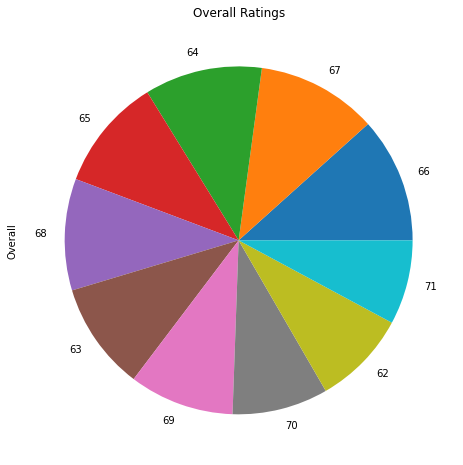

In [32]:
top10 = new_df['Overall'].value_counts()[:10]
top10.plot(kind='pie',figsize=(10,8))
plt.title('Overall Ratings')

Q16-What is the relationship between age and individual potential of the player? Visualize the relationship with appropriate plot and Comment on the same.

In [33]:
Age_Pot = df[['Age','Potential']].copy()
Age_Pot

,Age,Potential
0,31,94
1,33,94
2,26,93
3,27,93
4,27,92
...,...,...
18202,19,65
18203,19,63
18204,16,67
18205,17,66


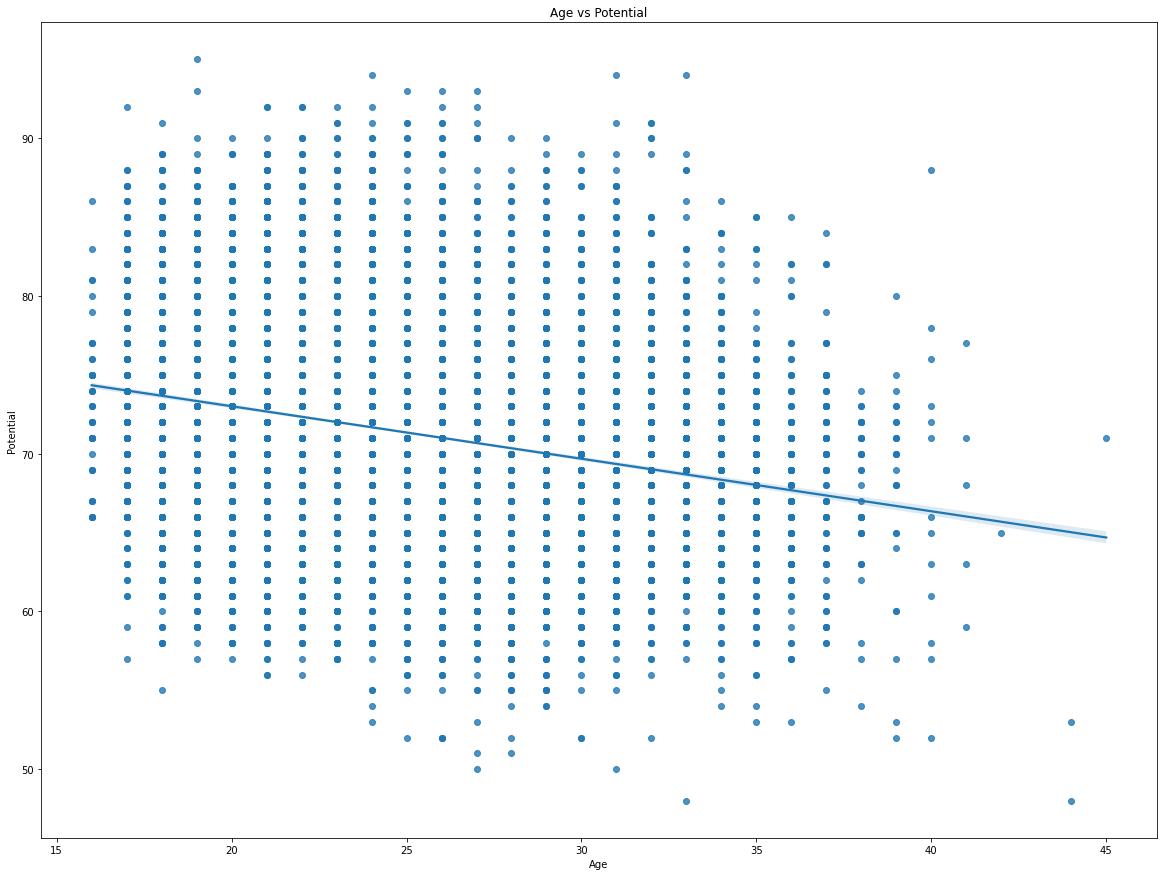

In [34]:
plt.figure(figsize=(20, 15))
sns.regplot(df['Age'] , df['Potential'])
plt.title('Age vs Potential')
plt.show()

Youngers are less potential than olders

Q17-Which features directly contribute to the wages of the players? Support your answer with a plot and a metric.

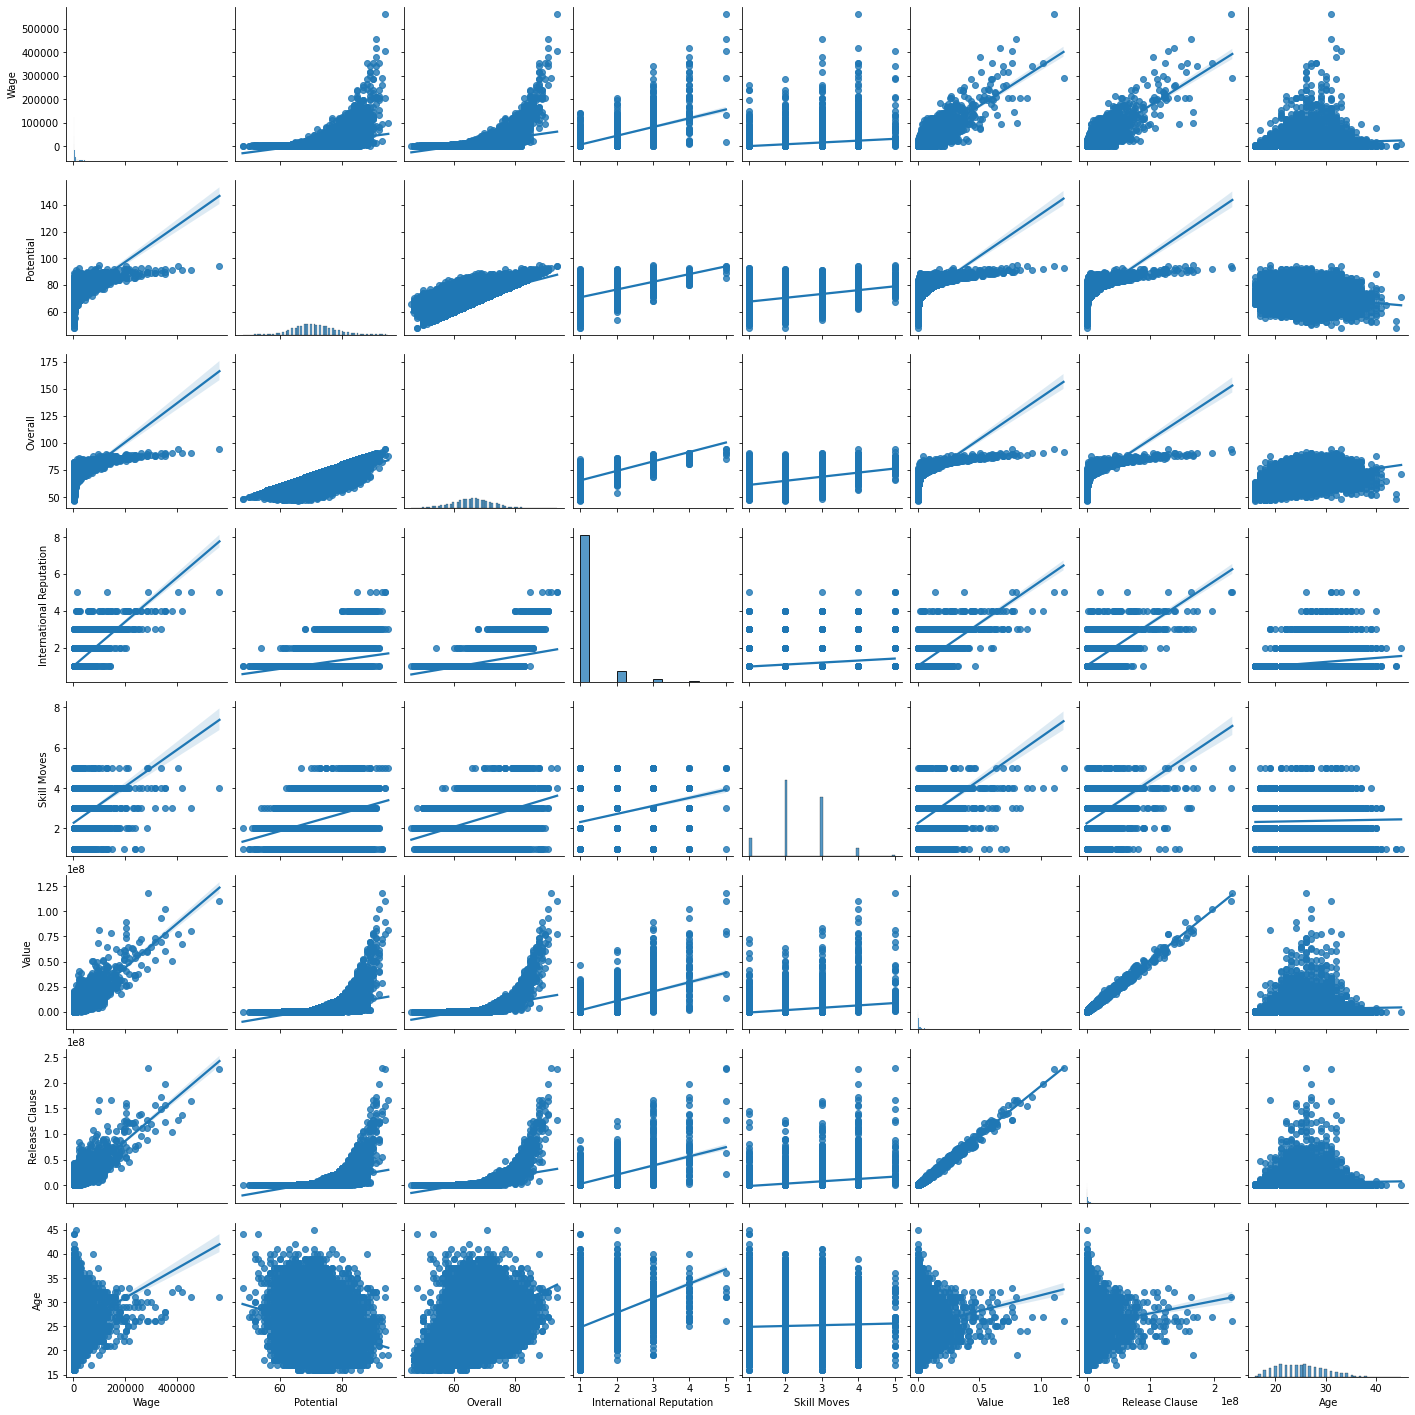

In [35]:
df_pairplot = df[['Wage','Potential','Overall','International Reputation','Skill Moves','Work Rate','Value','Release Clause','Age']]
sns.pairplot(df_pairplot, kind='reg')
plt.show()

Factors affecting the wage are Overall,International Reputation,Value and Release Clause

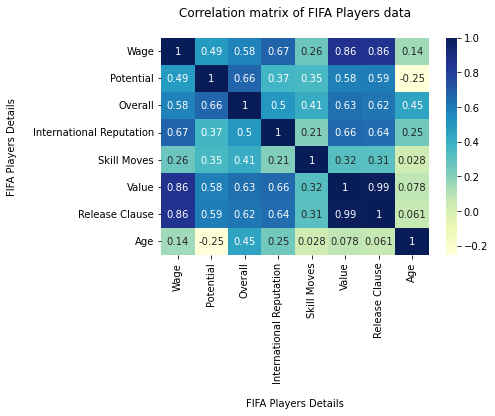

In [36]:
hm = sns.heatmap(df_pairplot.corr(), cmap="YlGnBu", annot=True)

hm.set(xlabel='\nFIFA Players Details', ylabel='FIFA Players Details\n', title = "Correlation matrix of FIFA Players data\n")

plt.show()

Q18-Find the position in the pitch where the maximum number of players play and the position where the minimum number of players play? Display
it using a plot.

In [37]:
df['Position']

0         RF
1         ST
2         LW
3         GK
4        RCM
        ... 
18202     CM
18203     ST
18204     ST
18205     RW
18206     CM
Name: Position, Length: 18207, dtype: object

In [38]:
from collections import Counter
def plot_most_common(category):
    bar_plot = dict(Counter(df[category].values).most_common(5))
    plt.bar(*zip(*bar_plot.items()))
    plt.show()

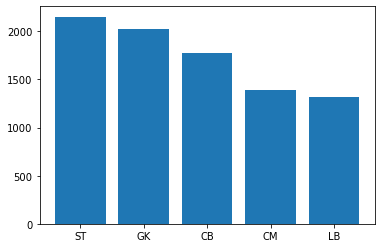

In [39]:
plot_most_common('Position')

The position in the pitch where the maximum number of players play is (ST) and the position where the minimum number of players play is (LB) as shown above.

Q19-How many players are from the club 'Juventus' and the wage is greater than 200K? Display all the information of such players.

In [40]:
wage_200_above_df = df[df['Wage'] > 200000]
wage_200_above_df[wage_200_above_df['Club'] == 'Juventus']

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
15,211110,P. Dybala,24,Argentina,89,94,Juventus,89000000.0,205000.0,Left,...,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,153500000.0
24,138956,G. Chiellini,33,Italy,89,89,Juventus,27000000.0,215000.0,Left,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0


Q20-Generate a data frame containing top 5 players by Overall rating for each unique position.

In [41]:
# Get count of unique positions in the dataset
distinct_positions = len(pd.unique(df['Position']))
print('Count of distinct positions: ',distinct_positions)
print('Data Frame row count: ',distinct_positions * 5)
sorted_df = df.sort_values(by = 'Overall', ascending = False).groupby('Position').head(5)
sorted_df = sorted_df.sort_values(by = ['Position','Overall'], ascending = [True,False]).reset_index(drop=True)
sorted_df[['Position','Name','Overall']]

Count of distinct positions:  28
Data Frame row count:  140


,Position,Name,Overall
0,CAM,A. Griezmann,89
1,CAM,C. Eriksen,88
2,CAM,M. Özil,86
3,CAM,T. Müller,86
4,CAM,Roberto Firmino,86
...,...,...,...
130,ST,Cristiano Ronaldo,94
131,ST,R. Lewandowski,90
132,ST,S. Agüero,89
133,ST,H. Kane,89


Q21- What is the average wage one can expect to pay for the top 5 players in every position? (use the data frame created in Q20)

In [42]:
sorted_df[['Position','Wage']].groupby('Position').mean('Wage')

,Wage
Position,
CAM,174000.0
CB,124800.0
CDM,199200.0
CF,47400.0
CM,130600.0
GK,192800.0
LAM,81600.0
LB,177200.0
LCB,162000.0
